## Analyzing EIA Electricity Data

The U.S. Energy Information Agency has Annual Electric Power Industry data spanning from 1990 to 2016. The data can be found here:

https://www.eia.gov/electricity/data/eia861/

The Data Analyst should use at least the 2016 dataset to answer the questions. The creativity of how you explore the data, present it, and analyze it will be key. Providing aditional analysis based on your background will be a huge plus.

Please provide all the python code used to answer the questions.

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('/Users/jaykim/Downloads/Drift/f8612016/Dynamic_Pricing2016.xlsx', header=[0, 1, 2],index_col=None)
df.reset_index(inplace=True)
df.head(5)

Utility Characteristics index Utility Characteristics  \
                                   Unnamed: 0_level_1   
Data Year                              Utility Number   
0                        2016                      55   
1                        2016                      84   
2                        2016                      97   
3                        2016                     108   
4                        2016                     162   

Utility Characteristics                                                   \
                                   Unnamed: 1_level_1 Unnamed: 2_level_1   
Data Year                                Utility Name              State   
0                             City of Aberdeen - (MS)                 MS   
1                                 A & N Electric Coop                 VA   
2                                 Adams Electric Coop                 IL   
3                        Adams-Columbia Electric Coop                 WI   
4                             Aiken Electric Coop Inc                 SC   

Utility Characteristics          Number of                        \
                        Customers Enrolled                         
Data Year                      Residential Commercial Industrial   
0                                        0         16          1   
1                                        4          .          .   
2                                       35          5          .   
3                                      440        105          .   
4                                        0         43          .   

Utility Characteristics                         Types of Program  \
                                             Time of Use Pricing   
Data Year               Transportation Total         Residential   
0                                    0    17                   N   
1                                    .     4                   Y   
2                                    .    40                   Y   
3                                    .   545                   Y   
4                                    .    43                   Y   

Utility Characteristics      ...                                             \
                             ...       Variable Peak Pricing                  
Data Year                    ...                  Industrial Transportation   
0                            ...                           N              N   
1                            ...                           N              N   
2                            ...                           N              N   
3                            ...                           N              N   
4                            ...                           N              N   

Utility Characteristics                                              \
                        Critical Peak Pricing                         
Data Year                         Residential Commercial Industrial   
0                                           N          N          N   
1                                           N          N          N   
2                                           N          N          N   
3                                           N          N          N   
4                                           N          N          N   

Utility Characteristics                                                 \
                                       Critical Peak Rebate              
Data Year               Transportation          Residential Commercial   
0                                    N                    N          N   
1                                    N                    N          N   
2                                    N                    N          N   
3                                    N                    N          N   
4                                    N                    N          N   

Utility Characteristics                          

<hr/>
## Dynamic Electricity Pricing

Some questions may require no data analysis (only research), while others may require both.

### 1) Which U.S. states have deregulated retail electricity markets?

In [ ]:
CA, CT, DE, IL, ME, MD, MA, MI, NH, NJ, NY, OH, OR, PA, RI, TX, VI, and Washington DC

In [ ]:
<Reference>
https://www.electricchoice.com/map-deregulated-energy-markets/

</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>

### 2) Which U.S. states have the most power utilities utilizing dynamic pricing?

In [3]:
def num_utility_dynamic(df):
    # Counting a number of utilities in each state
    states = Counter(df['Utility Characteristics']['Unnamed: 2_level_1']['State'])
    
    # Looking for a state that has the maximum number of utilities
    res=[]
    for k,v in states.items():
        if v== max(states.values()):
            res.append(k)
            
    print('Number of utilities: %d' %(max(states.values())))
    return res

In [4]:
num_utility_dynamic(df)

Number of utilities: 66


['WI', 'TN']

</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>
</br>

### 3) Which states have the most enrolled customers in dynamic pricing?

In [5]:
def num_cust_dynamic(df):
    # Reorganize a DataFrame with relavant data
    df2 = pd.DataFrame({'state':df['Utility Characteristics']['Unnamed: 2_level_1']['State'], 
                        'total':df['Number of']['Customers Enrolled']['Total']})
    
    # Calculating the total sum for each state
    return df2.groupby(['state'])['total'].sum().reset_index(name ='TotalAmount').sort_values('TotalAmount', ascending=False).head(1)
 

In [6]:
num_cust_dynamic(df)

,state,TotalAmount
4,CA,1859211


<hr/>
## Metering

Some questions may require no data analysis (only research), while others may require both.

</br>
</br>
</br>
</br>
</br>
</br>

### 1) What policies are leading to more Net Metering customers in Southern California Edison in CA compared to Consolidated Edison in NY?

In 2006, the solar tax credit in California was reduced by half, and installation and equipment costs have improved since then. The tax incentives led reduction in installation cost as shown in Figure 1 below. Governor Schwarzenegger launched a campaign called Million Solar Roofs in 2005 to expand the solar capacity, and he signed Net Energy Metering (NEM) into law in 2009. Tax incentive, installation cost reduction, and net metering policy in California led to a rapid growth in solar energy, and it became the very first state where solar energy generated by customers exceeded 1 gigawatt. Data from U.S. Energy Information Administraion shows that California has the largest installed capacity which is 4 times more than other states as shown in Figure 2 below, and the capacity in Californoia is about 6.65 time greater than that in New York.

New York introduced Track Two to change the rate structure gradually to shift from net metering to Value of Distributed Energy Resources (DER) to focus on an accurate valuation of the benefits from DERs, while California focuses on evolving NEM to NEM 2.0 that can increase the average savings.

The average annual sunshine in California is about 3055 hours while in New York is only 2120 hours. California naturally has a better environment to have a bigger NEM market considering the solar energy market is dominating compared to other technologies.

In [ ]:
<Reference>
https://www.eia.gov/electricity/data/eia861/
http://www.scottmadden.com/wp-content/uploads/2017/05/ScottMadden_NEM_in_California_2017_0531.pdf
http://www.california-solar.org/inform/history-of-california-solar-power.php
http://www.scottmadden.com/wp-content/uploads/2016/12/SEPA-ScottMadden-51st-State-Report_DER-Integration-CA-NY.pdf
https://www.currentresults.com/Weather/US/average-annual-state-sunshine.php

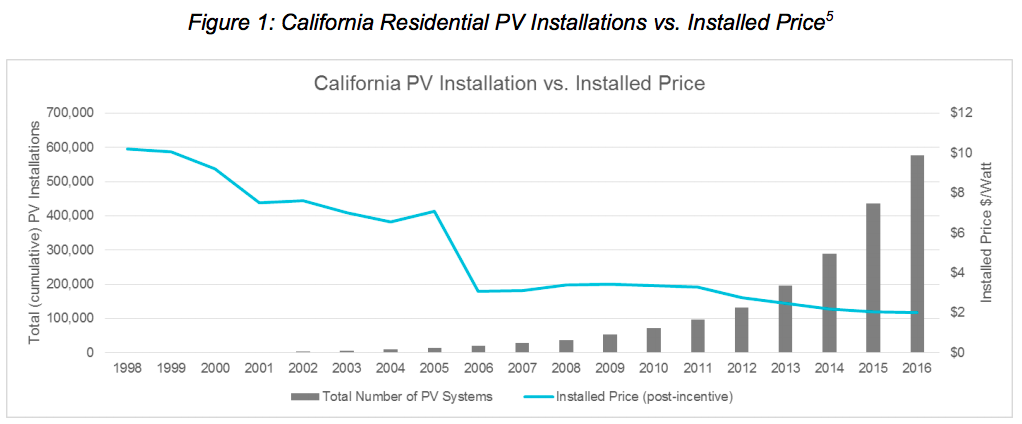

In [7]:
from IPython.display import Image
Image(filename='/Users/jaykim/Desktop/ScreenShot.png')

In [8]:
df_metering = pd.read_excel('/Users/jaykim/Downloads/Drift/f8612016/Net_Metering_2016.xlsx', header=[0, 1, 2, 3],index_col=None)
df_metering.reset_index(inplace=True)
df_metering.drop(df_metering.tail(1).index,inplace=True)

In [9]:
def metering_capacity(df_metering):
    df_metering_state = pd.DataFrame({'State': df_metering['Utility Level Data - States']['Utility Characteristics']['Unnamed: 0_level_2']['State'],
                                     'Capacity': df_metering['Utility Level Data - States']['All Technologies']['Capacity MW']['Total']})
    total_cap=df_metering_state.groupby(['State'])['Capacity'].sum().reset_index(name ='TotalCapacity').sort_values('TotalCapacity', ascending=False).head(5)
    print(total_cap)
    %matplotlib inline
    plt.figure(figsize=[10,6])
    y_pos = np.arange(5)
    plt.bar(y_pos, total_cap.TotalCapacity, align='center')
    plt.xticks(y_pos, total_cap.State, fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('Total Capacity (MW)', fontsize=15)
    plt.title('Figure 2. Top 5 States for NEM Capacity in 2016',fontsize=20)

   State  TotalCapacity
4     CA       5449.640
19    MA       1201.222
31    NJ       1180.107
3     AZ        900.267
34    NY        819.982


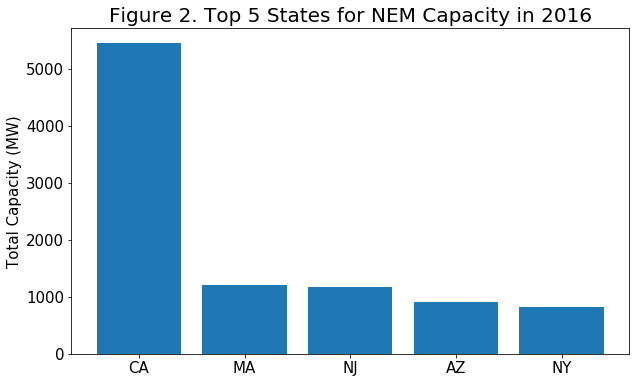

In [10]:
metering_capacity(df_metering)

### 2) Which utility has the most Net Metering Capacity (MW) by technology?

In [11]:
def net_metering_cap(df_metering):
    # Slicing the data frame headers
    tech = df_metering.xs('Utility Level Data - States',axis=1).columns.values.tolist()
   
    # To obtain a list of technologies
    tech2=[]   
    for i in range(3,len(tech)):
        if tech[i][0] not in tech2:
            tech2.append(tech[i][0])
    
    # To iterate through different technologies to find the max net metering capacity
    for t in tech2:
        max_cap = df_metering[df_metering['Utility Level Data - States'][t]['Capacity MW']['Total']
                              ==max(df_metering['Utility Level Data - States'][t]['Capacity MW']['Total'])]
        print(t,': %s, Capacity: %d (MW)' %(max_cap['Utility Level Data - States']['Utility Characteristics']['Unnamed: 2_level_2']['Utility Name'].iloc[0],
                                   max_cap['Utility Level Data - States'][t]['Capacity MW']['Total'].iloc[0]))

In [12]:
net_metering_cap(df_metering)

Photovoltaic : Pacific Gas & Electric Co, Capacity: 2359 (MW)
Wind : NSTAR Electric Company, Capacity: 33 (MW)
Other : Pacific Gas & Electric Co, Capacity: 86 (MW)
All Technologies : Pacific Gas & Electric Co, Capacity: 2470 (MW)


<hr/>
## Electricity Sales

Some questions may require no data analysis (only research), while others may require both.

### 1) Which Independent System Operator (ISO) (or also known as a Balancing Authority) region has the largest retail electricity sales?

In [13]:
df_saleCS = pd.read_excel('/Users/jaykim/Downloads/Drift/f8612016/Sales_Ult_cust_CS_2016.xlsx', header=[0, 1, 2],index_col=None)
df_saleCS.reset_index(inplace=True)
df_sale = pd.read_excel('/Users/jaykim/Downloads/Drift/f8612016/Sales_Ult_cust_2016.xlsx', header=[0, 1, 2],index_col=None)
df_sale.reset_index(inplace=True)

In [14]:
def BA_sales(df_saleCS, df_sale):
    # Reorganize a DataFrame with relavant data
    BAcode = df_saleCS['Utility Characteristics']['Unnamed: 5_level_1']['BA Code'].tolist()
    BAcode += df_sale['Utility Characteristics']['Unnamed: 7_level_1']['BA_CODE'].tolist()
    sales = df_saleCS['TOTAL']['Sales']['Megawatthours'].tolist()
    sales += df_sale['TOTAL']['Sales']['Megawatthours'].tolist()
    df_sale_total = pd.DataFrame({'BAcode': BAcode, 'Sales': sales})
    # Clean up
    df_sale_total.dropna(inplace=True)
    df_sale_total = df_sale_total[df_sale_total.Sales != '.']
    
    # Calculating the total sum grouped by balancing authority
    max_sales = df_sale_total.groupby(['BAcode'])['Sales'].sum().reset_index(name ='TotalSales').sort_values('TotalSales', ascending=False).head(1)
    print('%s has the largest electricity sales: %d' %(max_sales.BAcode.iloc[0], max_sales.TotalSales.iloc[0]))

In [15]:
BA_sales(df_saleCS, df_sale)

PJM has the largest electricity sales: 1091624295


## Python Question 
Implement the function filter_by_class: It takes a feature matrix, X, an array of classes, y, and a class label, label. It should return all of the rows from X whose label is the given label.

</br>
</br>
</br>
</br>
</br>
</br>

In [16]:
def filter_by_class(X, y, label):
    return np.array([X[i] for i,item in enumerate(y) if item==label])

</br>
</br>
</br>
</br>
</br>

In [17]:
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
y = np.array(["a", "c", "a", "b"])

filter_by_class(X, y, "a")

array([[1, 2, 3],
       [7, 8, 9]])

In [18]:
filter_by_class(X, y, "b")

array([[10, 11, 12]])